### Explore data

In [224]:
import pandas as pd

pm10 = pd.read_excel("../../data/AirQuality_Krakow/2019_PM10_1g.xlsx")
pm10.head()

,DateTime,MpKrakAlKras,MpKrakBujaka,MpKrakBulwar,MpKrakOsPias,MpKrakSwoszo,MpKrakWadow,MpKrakZloRog
0,2019-01-01 01:00:00,88.2185,139.7900,120.0570,161.0530,NaN,83.6841,77.8355
1,2019-01-01 02:00:00,95.2209,92.5099,63.4217,62.3289,NaN,66.3402,82.9678
2,2019-01-01 03:00:00,85.3689,57.1358,48.6426,56.5202,NaN,55.8833,64.5276
3,2019-01-01 04:00:00,70.8575,39.4615,36.7828,49.5539,NaN,44.1614,46.5672
4,2019-01-01 05:00:00,50.1935,27.1423,28.7538,36.1824,NaN,34.5853,48.1257


### Note about data set air quality

In [225]:
print("Data shape:", pm10.shape)
print(f"Statistic: {pm10.describe()}")
print("\nColumns:", pm10.columns.tolist())
print("\nData types:")
print(pm10.dtypes)
print("\nFirst few timestamps:")
print(pm10['DateTime'].head())
print("\nDate range:")
print(f"From: {pm10['DateTime'].min()}")
print(f"To: {pm10['DateTime'].max()}")

Data shape: (8760, 8)
Statistic:                   DateTime  MpKrakAlKras  MpKrakBujaka  MpKrakBulwar  \
count                 8760   8730.000000   8655.000000   8712.000000   
mean   2019-07-02 12:30:00     49.453956     34.761797     32.751912   
min    2019-01-01 01:00:00      3.446220      3.000000      3.000000   
25%    2019-04-02 06:45:00     26.605000     16.841850     16.027325   
50%    2019-07-02 12:30:00     39.768750     25.826100     24.614750   
75%    2019-10-01 18:15:00     62.136950     41.876350     41.524600   
max    2020-01-01 00:00:00    251.398000    222.938000    349.811000   
std                    NaN     33.578147     28.920883     25.066072   

       MpKrakOsPias  MpKrakSwoszo  MpKrakWadow  MpKrakZloRog  
count   8606.000000   8384.000000  8691.000000   8482.000000  
mean      31.020584     30.735291    28.883373     34.862077  
min        3.000000      3.000000     2.997050      3.000000  
25%       15.792450     15.289300    14.253700     17.422300  
50%

### Explore Station data


In [226]:

stations_df = pd.read_excel("../../data/AirQuality_Krakow/Stations.xlsx")
print("Station information:")
print(f"Number of stations: {len(stations_df)}")
print("\nStation columns:", stations_df.columns.tolist())
print("\nStation details:")
stations_df

Station information:
Number of stations: 7

Station columns: ['Station Code', 'International Code', 'Street address', 'Area Type', 'Station Category', 'WGS84 φ N', 'WGS84 λ E']

Station details:


,Station Code,International Code,Street address,Area Type,Station Category,WGS84 φ N,WGS84 λ E
0,MpKrakAlKras,PL0012A,"Kraków, Aleja Krasińskiego",urban,stationary container unit,50.057678,19.926189
1,MpKrakBujaka,PL0501A,"Kraków, ul. Bujaka",urban,stationary container unit,50.010575,19.949189
2,MpKrakBulwar,PL0039A,"Kraków, ul. Bulwarowa",urban,stationary container unit,50.069308,20.053492
3,MpKrakOsPias,PL0642A,"Kraków, os. Piastów",urban,free-standing dust sampler,50.098508,20.018269
4,MpKrakSwoszo,PL0735A,"Kraków, os. Swoszowice",urban,free-standing dust sampler,49.991442,19.936792
5,MpKrakWadow,PL0670A,"Kraków, os. Wadów",urban,stationary container unit,50.100569,20.122561
6,MpKrakZloRog,PL0643A,"Kraków, ul. Złoty Róg",urban,free-standing dust sampler,50.081197,19.895358


### Explore Weather data

In [227]:
weather_df = pd.read_csv("../../data/Weather_Krakow/2020.csv")
weather_df.head()
# weather_df.columns
# print(f"Basis statistic: {weather_df.describe()}")
# print(f"colums: {weather_df.columns}")

C:\Users\PC\AppData\Local\Temp\ipykernel_30764\4268840039.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  weather_df = pd.read_csv("../../data/Weather_Krakow/2020.csv")


,STATION,DATE,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,...,MA1,MD1,MW1,MW2,OC1,OD1,OD2,OD3,REM,EQD
0,12566099999,2020-01-01T00:00:00,4,50.077731,19.784836,241.09,"BALICE, PL",FM-12,99999,V020,...,"99999,9,10007,1","2,1,010,1,+999,9",NaN,NaN,NaN,NaN,NaN,NaN,SYN07612566 12580 72606 10044 20005 30007 4030...,NaN
1,12566099999,2020-01-01T00:00:00,4,50.077731,19.784836,241.09,"BALICE, PL",FM-15,99999,V020,...,"10290,1,99999,9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET058METAR EPKK 010000Z 27010KT 9999 FEW023 B...,NaN
2,12566099999,2020-01-01T00:30:00,4,50.077731,19.784836,241.09,"BALICE, PL",FM-15,99999,V020,...,"10290,1,99999,9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET058METAR EPKK 010030Z 27010KT 9999 FEW023 B...,NaN
3,12566099999,2020-01-01T01:00:00,4,50.077731,19.784836,241.09,"BALICE, PL",FM-12,99999,V020,...,"99999,9,10010,1","2,1,009,1,+999,9",NaN,NaN,NaN,NaN,NaN,NaN,SYN08012566 42570 72405 10040 20007 30010 4031...,NaN
4,12566099999,2020-01-01T01:00:00,4,50.077731,19.784836,241.09,"BALICE, PL",FM-15,99999,V020,...,"10290,1,99999,9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET058METAR EPKK 010100Z 25010KT 9999 FEW023 B...,NaN


### Preprocess data

1. Load the data
2. Data quaility check
3. Data cleaning and preprocessing
4. Save the process data

In [228]:
from pathlib import Path


def load_all_weather_data():
    weather_dir = Path("../../data/Weather_Krakow")
    weather_files = ["2019.csv", "2020.csv", "2021.csv", "2022.csv", "2023.csv"]
    
    all_weather = []
    
    for file in weather_files:
        file_path = weather_dir / file
        if file_path.exists():
            print(f"Loading weather {file}...")
            df = pd.read_csv(file_path, low_memory=False)
            df['DATE'] = pd.to_datetime(df['DATE'])
            all_weather.append(df)
        else:
            print(f"{file} not found")
    
    if all_weather:
        combined_df = pd.concat(all_weather, ignore_index=True)
        combined_df = combined_df.sort_values('DATE').reset_index(drop=True)
        print(f"Combined weather data: {len(combined_df)} records")
        return combined_df
    else:
        return None


weather_all_data = load_all_weather_data()


Loading weather 2019.csv...
Loading weather 2020.csv...
Loading weather 2021.csv...
Loading weather 2022.csv...
Loading weather 2023.csv...
Combined weather data: 130328 records


In [229]:
def load_all_pm10_data():
    data_dir = Path("../../data/AirQuality_Krakow")
    pm10_files = [
        "2019_PM10_1g.xlsx",
        "2020_PM10_1g.xlsx", 
        "2021_PM10_1g.xlsx",
        "2022_PM10_1g.xlsx",
        "2023_PM10_1g.xlsx"
    ]
    
    all_data = []
    
    for file in pm10_files:
        file_path = data_dir / file
        if file_path.exists():
            print(f"Loading {file}...")
            df = pd.read_excel(file_path)
            df['DateTime'] = pd.to_datetime(df['DateTime'])
            all_data.append(df)
         
        else:
            print(f"Warning: {file} not found")
    
    if all_data:
        combined_df = pd.concat(all_data, ignore_index=True)
        combined_df = combined_df.sort_values('DateTime').reset_index(drop=True)
        return combined_df
    else:
        return None

pm10_all_years = load_all_pm10_data()

Loading 2019_PM10_1g.xlsx...
Loading 2020_PM10_1g.xlsx...
Loading 2021_PM10_1g.xlsx...
Loading 2022_PM10_1g.xlsx...
Loading 2023_PM10_1g.xlsx...


In [230]:
stations_all_data = pd.read_excel("../../data/AirQuality_Krakow/Stations.xlsx")
print(f"Loaded {len(stations_all_data)} stations")

station_mapping = {}
for _, row in stations_all_data.iterrows():
    station_code = row['Station Code']
    station_mapping[station_code] = {
        'code': station_code,
        'international_code': row.get('International Code', ''),
        'address': row.get('Street address', ''),
        'latitude': row['WGS84 φ N'],
        'longitude': row['WGS84 λ E'],
        'area_type': row.get('Area Type', ''),
        'category': row.get('Station Category', '')
    }

print(f"Station mapping created for {len(station_mapping)} stations")

pm10_available = 'pm10' in locals() and pm10 is not None
weather_available = 'weather_all_data' in locals() and weather_all_data is not None



if pm10_available and weather_available:
    pm10_date_range = (pm10['DateTime'].min(), pm10['DateTime'].max())
    weather_date_range = (weather_all_data['DATE'].min(), weather_all_data['DATE'].max())
    
    print(pm10_date_range)
    print(weather_date_range)
    
    overlap_start = max(pm10_date_range[0], weather_date_range[0])
    overlap_end = min(pm10_date_range[1], weather_date_range[1])
    
    
    
    overlap_days = (overlap_end - overlap_start).days
    print(f"Overlap duration: {overlap_days} days")
else:
    print("khong compare dc ")

Loaded 7 stations
Station mapping created for 7 stations
(Timestamp('2019-01-01 01:00:00'), Timestamp('2020-01-01 00:00:00'))
(Timestamp('2019-01-01 00:00:00'), Timestamp('2023-12-31 23:30:00'))
Overlap duration: 364 days


In [231]:
pm10.head()
pm10.describe()
print(pm10.isna().sum())
print(len(pm10))

DateTime          0
MpKrakAlKras     30
MpKrakBujaka    105
MpKrakBulwar     48
MpKrakOsPias    154
MpKrakSwoszo    376
MpKrakWadow      69
MpKrakZloRog    278
dtype: int64
8760


In [232]:
# fill na của pm10 bằng cách nội suy tuyến tính, set date, time làm index 
pm10_all_years = pm10_all_years.set_index('DateTime')
pm10_all_years = pm10_all_years.interpolate(method='time')
pm10_all_years = pm10_all_years.reset_index()

In [233]:
weather_all_data.head()
weather_all_data.describe()
print(weather_all_data.isna().sum())
print(len(weather_all_data))


STATION                 0
DATE                    0
SOURCE                  0
LATITUDE                0
LONGITUDE               0
ELEVATION               0
NAME                    0
REPORT_TYPE             0
CALL_SIGN               0
QUALITY_CONTROL         0
WND                     0
CIG                     0
VIS                     0
TMP                     0
DEW                     0
SLP                     0
AA1                123074
AA2                129323
AJ1                130122
AY1                114226
AY2                114226
AZ1                129709
AZ2                129709
ED1                128621
GA1                 39239
GA2                 96485
GA3                126028
GE1                 39239
GF1                 32484
IA1                130083
KA1                126703
KA2                126703
MA1                     1
MD1                 86877
MW1                 94393
MW2                126909
MW3                130293
OC1                129660
OD1         

In [234]:
# loại bỏ các cột bị thiếu hơn 80%
threshold = 0.8 * len(weather_all_data)
weather_all_data = weather_all_data.dropna(axis=1, thresh=(len(weather_all_data) - threshold))


In [235]:
weather_all_data = weather_all_data.set_index('DATE')
weather_all_data = weather_all_data.interpolate(method='time')
weather_all_data = weather_all_data.reset_index()

C:\Users\PC\AppData\Local\Temp\ipykernel_30764\3799247957.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  weather_all_data = weather_all_data.interpolate(method='time')


In [236]:
weather_all_data = weather_all_data.dropna()

In [237]:
weather_all_data.head()
weather_all_data.describe()
print(weather_all_data.isna().sum())
print(len(weather_all_data))


DATE               0
STATION            0
SOURCE             0
LATITUDE           0
LONGITUDE          0
ELEVATION          0
NAME               0
REPORT_TYPE        0
CALL_SIGN          0
QUALITY_CONTROL    0
WND                0
CIG                0
VIS                0
TMP                0
DEW                0
SLP                0
GA1                0
GA2                0
GE1                0
GF1                0
MA1                0
MD1                0
MW1                0
REM                0
dtype: int64
4536


In [238]:
# pm10 = pm10[(pm10['DateTime'] >= start) & (pm10['DateTime'] <= end)]
# weather_all_data = weather_all_data[(weather_all_data['DATE'] >= start) & (weather['DATE'] <= end)]


In [239]:
print(f"Check duplicate of pm10  {pm10_all_years.duplicated().sum()}")
print(f"Check duplicate of Weather {weather_all_data.duplicated().sum()}")
print(f" Check duplicate of Station data {stations_all_data.duplicated().sum()}")

Check duplicate of pm10  0
Check duplicate of Weather 0
 Check duplicate of Station data 0


In [240]:
# drop MpKrakSwoszo columns in pm10_all_years
pm10_all_years = pm10_all_years.drop(columns=["MpKrakSwoszo"])



In [241]:
weather_all_data.head()

,DATE,STATION,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,...,DEW,SLP,GA1,GA2,GE1,GF1,MA1,MD1,MW1,REM
6,2019-01-01 02:00:00,12566099999,4,50.077731,19.784836,241.09,"BALICE, PL",FM-12,99999,V020,...,"-0010,1","10286,1","03,1,+00800,1,06,1","99,9,+99999,9,02,1","9,AGL ,+99999,+99999","05,99,1,03,1,99,9,00800,1,99,9,99,9","99999,9,09981,1","8,1,021,1,+999,9","10,1",SYN08012566 41556 52104 10008 21010 39981 4028...
27,2019-01-01 09:00:00,12566099999,4,50.077731,19.784836,241.09,"BALICE, PL",FM-12,99999,V020,...,"+0011,1","10211,1","04,1,+00180,1,07,1","08,1,+00450,1,06,1","9,AGL ,+99999,+99999","08,99,1,04,1,99,9,00180,1,99,9,99,9","99999,9,09909,1","8,1,031,1,+999,9","61,1",SYN08212566 41245 82202 10018 20011 39909 4021...
31,2019-01-01 10:00:00,12566099999,4,50.077731,19.784836,241.09,"BALICE, PL",FM-12,99999,V020,...,"+0019,1","10198,1","01,1,+00090,1,07,1","07,1,+00150,1,07,1","9,AGL ,+99999,+99999","08,99,1,01,1,99,9,00090,1,99,9,99,9","99999,9,09897,1","7,1,034,1,+999,9","61,1",SYN09212566 41150 82403 10025 20019 39897 4019...
33,2019-01-01 11:00:00,12566099999,4,50.077731,19.784836,241.09,"BALICE, PL",FM-12,99999,V020,...,"+0026,1","10180,1","04,1,+00150,1,07,1","08,1,+00390,1,06,1","9,AGL ,+99999,+99999","08,99,1,04,1,99,9,00150,1,99,9,99,9","99999,9,09881,1","7,1,040,1,+999,9","61,1",SYN09212566 41235 82105 10033 20026 39881 4018...
46,2019-01-01 15:00:00,12566099999,4,50.077731,19.784836,241.09,"BALICE, PL",FM-12,99999,V020,...,"+0036,1","10131,1","01,1,+00150,1,07,1","08,1,+00330,1,06,1","9,AGL ,+99999,+99999","08,99,1,01,1,99,9,00150,1,99,9,99,9","99999,9,09835,1","7,1,025,1,+999,9","61,1",SYN08812566 41256 82308 10053 20036 39835 4013...


In [242]:
pm10_all_years.head()

,DateTime,MpKrakAlKras,MpKrakBujaka,MpKrakBulwar,MpKrakOsPias,MpKrakWadow,MpKrakZloRog
0,2019-01-01 01:00:00,88.2185,139.7900,120.0570,161.0530,83.6841,77.8355
1,2019-01-01 02:00:00,95.2209,92.5099,63.4217,62.3289,66.3402,82.9678
2,2019-01-01 03:00:00,85.3689,57.1358,48.6426,56.5202,55.8833,64.5276
3,2019-01-01 04:00:00,70.8575,39.4615,36.7828,49.5539,44.1614,46.5672
4,2019-01-01 05:00:00,50.1935,27.1423,28.7538,36.1824,34.5853,48.1257


### Detect outliers
detect outliers in PM10 data using boxplot

```python

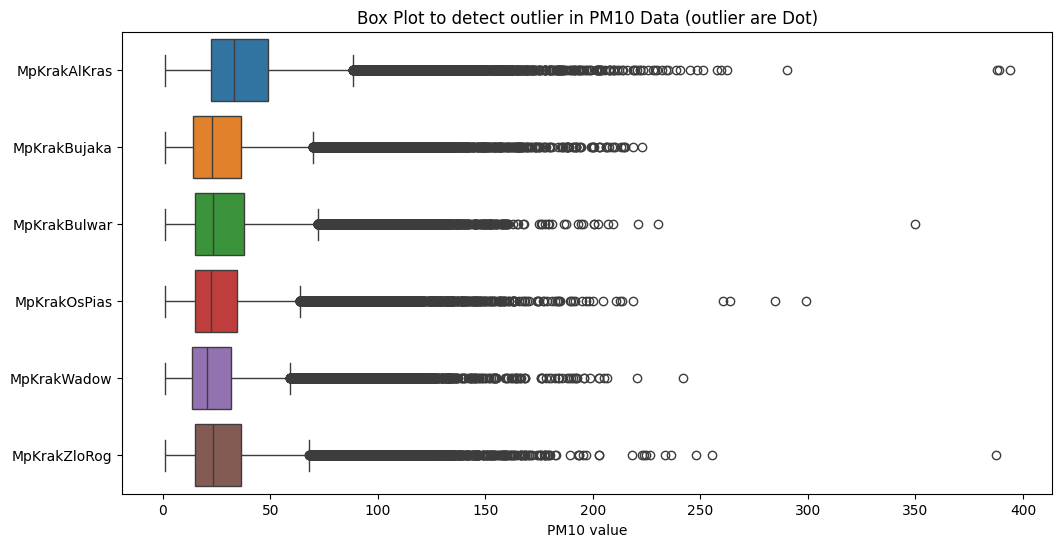

MpKrakAlKras: 2456 outliers (5.60%)
MpKrakBujaka: 3039 outliers (6.93%)
MpKrakBulwar: 2786 outliers (6.36%)
MpKrakOsPias: 3030 outliers (6.91%)
MpKrakWadow: 3045 outliers (6.95%)
MpKrakZloRog: 2950 outliers (6.73%)


In [243]:
import matplotlib.pyplot as plt
import seaborn as sns

station_cols = ['MpKrakAlKras', 'MpKrakBujaka', 'MpKrakBulwar', 'MpKrakOsPias', 
                'MpKrakWadow', 'MpKrakZloRog']  


plt.figure(figsize=(12, 6))
sns.boxplot(data=pm10_all_years[station_cols], orient="h")
plt.title("Box Plot to detect outlier in PM10 Data (outlier are Dot)")
plt.xlabel("PM10 value")
plt.show()

for col in station_cols:
    Q1 = pm10_all_years[col].quantile(0.25)
    Q3 = pm10_all_years[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = pm10_all_years[(pm10_all_years[col] < lower) | (pm10_all_years[col] > upper)][col]
    print(f"{col}: {len(outliers)} outliers ({100*len(outliers)/len(pm10_all_years):.2f}%)")

### Remove outliers
after detecting outliers, we not remove from this dataset since it is time series data so it just replace using interpolation method
```python

In [244]:
import numpy as np
def replace_outliers_iqr_interpolate(df, cols):
    clean_df = df.copy()
    for col in cols:
        Q1 = clean_df[col].quantile(0.25)
        Q3 = clean_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        clean_df[col] = clean_df[col].mask(
            (clean_df[col] < lower_bound) | (clean_df[col] > upper_bound),np.nan)

        clean_df[col] = clean_df[col].interpolate(method='linear', limit_direction='both')
    
    return clean_df

pm10_cols = ['MpKrakAlKras', 'MpKrakBujaka', 'MpKrakBulwar',
             'MpKrakOsPias', 'MpKrakWadow', 'MpKrakZloRog']

pm10_all_years_clean = replace_outliers_iqr_interpolate(pm10_all_years, pm10_cols)




### After oulier removal

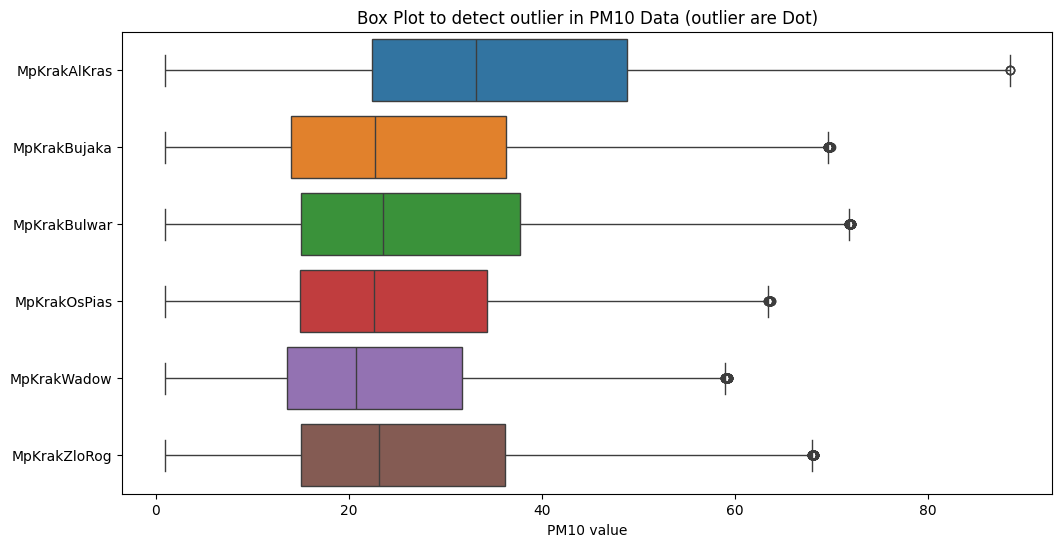

MpKrakAlKras: 3 outliers (0.01%)
MpKrakBujaka: 59 outliers (0.13%)
MpKrakBulwar: 53 outliers (0.12%)
MpKrakOsPias: 30 outliers (0.07%)
MpKrakWadow: 41 outliers (0.09%)
MpKrakZloRog: 39 outliers (0.09%)


In [245]:
import matplotlib.pyplot as plt
import seaborn as sns

station_cols = ['MpKrakAlKras', 'MpKrakBujaka', 'MpKrakBulwar', 'MpKrakOsPias', 
                'MpKrakWadow', 'MpKrakZloRog']  


plt.figure(figsize=(12, 6))
sns.boxplot(data=pm10_all_years_clean[station_cols], orient="h")
plt.title("Box Plot to detect outlier in PM10 Data (outlier are Dot)")
plt.xlabel("PM10 value")
plt.show()

for col in station_cols:
    Q1 = pm10_all_years_clean[col].quantile(0.25)
    Q3 = pm10_all_years_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = pm10_all_years_clean[(pm10_all_years_clean[col] < lower) | (pm10_all_years_clean[col] > upper)][col]
    print(f"{col}: {len(outliers)} outliers ({100*len(outliers)/len(pm10_all_years):.2f}%)")

### Merge data


In [ ]:
import pandas as pd
import numpy as np

weather_all_data.columns = weather_all_data.columns.str.lower().str.strip()
pm10_all_years_clean.columns = pm10_all_years_clean.columns.str.strip()
stations_all_data.columns = stations_all_data.columns.str.strip()

weather_all_data['date'] = pd.to_datetime(weather_all_data['date'])
pm10_all_years_clean['DateTime'] = pd.to_datetime(pm10_all_years_clean['DateTime'])

pm10_long = pm10_all_years_clean.melt(
    id_vars='DateTime',
    var_name='station_code',
    value_name='pm10_value'
)
pm10_long.rename(columns={'DateTime': 'timestamp'}, inplace=True)

stations_all_data.rename(columns={'Station Code': 'station_code'}, inplace=True)
station_coords = stations_all_data[['station_code', 'WGS84 φ N', 'WGS84 λ E']].copy()
station_coords.rename(columns={
    'WGS84 φ N': 'latitude', 
    'WGS84 λ E': 'longitude'
}, inplace=True)

pm10_with_coords = pd.merge(pm10_long, station_coords, on='station_code', how='left')


weather_all_data.rename(columns={'date': 'timestamp'}, inplace=True)

final_merged = pd.merge(pm10_with_coords, weather_all_data, on='timestamp', how='left')
final_merged = pd.merge(final_merged, stations_all_data, on='station_code', how='left')

coord_cols = ['latitude', 'longitude']
for col in coord_cols:
    if f'{col}_x' in final_merged.columns and f'{col}_y' in final_merged.columns:
        final_merged[col] = final_merged[f'{col}_x'].fillna(final_merged[f'{col}_y'])
        final_merged = final_merged.drop([f'{col}_x', f'{col}_y'], axis=1)

final_merged = final_merged.dropna(subset=['pm10_value', 'latitude', 'longitude'])

final_merged = final_merged.sort_values(['station_code', 'timestamp']).reset_index(drop=True)

final_merged.to_csv('merged_data.csv', index=False)




print("\nSample of merged data:")
final_merged.head()

Data integration complete!
Final dataset shape: (262944, 32)
Stations included: 6
Date range: 2019-01-01 01:00:00 to 2024-01-01 00:00:00
Columns: ['timestamp', 'station_code', 'pm10_value', 'station', 'source', 'elevation', 'name', 'report_type', 'call_sign', 'quality_control', 'wnd', 'cig', 'vis', 'tmp', 'dew', 'slp', 'ga1', 'ga2', 'ge1', 'gf1', 'ma1', 'md1', 'mw1', 'rem', 'International Code', 'Street address', 'Area Type', 'Station Category', 'WGS84 φ N', 'WGS84 λ E', 'latitude', 'longitude']

Sample of merged data:


,timestamp,station_code,pm10_value,station,source,elevation,name,report_type,call_sign,quality_control,...,mw1,rem,International Code,Street address,Area Type,Station Category,WGS84 φ N,WGS84 λ E,latitude,longitude
0,2019-01-01 01:00:00,MpKrakAlKras,88.2185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,PL0012A,"Kraków, Aleja Krasińskiego",urban,stationary container unit,50.057678,19.926189,50.057678,19.926189
1,2019-01-01 02:00:00,MpKrakAlKras,86.7937,1.256610e+10,4.0,241.09,"BALICE, PL",FM-12,99999.0,V020,...,"10,1",SYN08012566 41556 52104 10008 21010 39981 4028...,PL0012A,"Kraków, Aleja Krasińskiego",urban,stationary container unit,50.057678,19.926189,50.057678,19.926189
2,2019-01-01 03:00:00,MpKrakAlKras,85.3689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,PL0012A,"Kraków, Aleja Krasińskiego",urban,stationary container unit,50.057678,19.926189,50.057678,19.926189
3,2019-01-01 04:00:00,MpKrakAlKras,70.8575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,PL0012A,"Kraków, Aleja Krasińskiego",urban,stationary container unit,50.057678,19.926189,50.057678,19.926189
4,2019-01-01 05:00:00,MpKrakAlKras,50.1935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,PL0012A,"Kraków, Aleja Krasińskiego",urban,stationary container unit,50.057678,19.926189,50.057678,19.926189


In [247]:
weather_all_data.head()

,timestamp,station,source,latitude,longitude,elevation,name,report_type,call_sign,quality_control,...,dew,slp,ga1,ga2,ge1,gf1,ma1,md1,mw1,rem
6,2019-01-01 02:00:00,12566099999,4,50.077731,19.784836,241.09,"BALICE, PL",FM-12,99999,V020,...,"-0010,1","10286,1","03,1,+00800,1,06,1","99,9,+99999,9,02,1","9,AGL ,+99999,+99999","05,99,1,03,1,99,9,00800,1,99,9,99,9","99999,9,09981,1","8,1,021,1,+999,9","10,1",SYN08012566 41556 52104 10008 21010 39981 4028...
27,2019-01-01 09:00:00,12566099999,4,50.077731,19.784836,241.09,"BALICE, PL",FM-12,99999,V020,...,"+0011,1","10211,1","04,1,+00180,1,07,1","08,1,+00450,1,06,1","9,AGL ,+99999,+99999","08,99,1,04,1,99,9,00180,1,99,9,99,9","99999,9,09909,1","8,1,031,1,+999,9","61,1",SYN08212566 41245 82202 10018 20011 39909 4021...
31,2019-01-01 10:00:00,12566099999,4,50.077731,19.784836,241.09,"BALICE, PL",FM-12,99999,V020,...,"+0019,1","10198,1","01,1,+00090,1,07,1","07,1,+00150,1,07,1","9,AGL ,+99999,+99999","08,99,1,01,1,99,9,00090,1,99,9,99,9","99999,9,09897,1","7,1,034,1,+999,9","61,1",SYN09212566 41150 82403 10025 20019 39897 4019...
33,2019-01-01 11:00:00,12566099999,4,50.077731,19.784836,241.09,"BALICE, PL",FM-12,99999,V020,...,"+0026,1","10180,1","04,1,+00150,1,07,1","08,1,+00390,1,06,1","9,AGL ,+99999,+99999","08,99,1,04,1,99,9,00150,1,99,9,99,9","99999,9,09881,1","7,1,040,1,+999,9","61,1",SYN09212566 41235 82105 10033 20026 39881 4018...
46,2019-01-01 15:00:00,12566099999,4,50.077731,19.784836,241.09,"BALICE, PL",FM-12,99999,V020,...,"+0036,1","10131,1","01,1,+00150,1,07,1","08,1,+00330,1,06,1","9,AGL ,+99999,+99999","08,99,1,01,1,99,9,00150,1,99,9,99,9","99999,9,09835,1","7,1,025,1,+999,9","61,1",SYN08812566 41256 82308 10053 20036 39835 4013...


### check correlation
